# Qiskit: Quantum Circuits
* Last updated on 10/04/2023
* Ref: https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/quantum-circuits

In [1]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

In [2]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [3]:
circuit = QuantumCircuit(1)
state = Statevector.from_int(0, 2**1)
state.draw('latex')

<IPython.core.display.Latex object>

In [4]:
display(state.evolve(circuit).draw('latex'))

<IPython.core.display.Latex object>

In [5]:
circuit = QuantumCircuit(1)
circuit.h(0)
display(circuit.draw())
display(state.evolve(circuit).draw('latex'))

┌───┐
q: ┤ H ├
   └───┘

<IPython.core.display.Latex object>

In [6]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
display(circuit.draw())
display(state.evolve(circuit).draw('latex'))

┌───┐┌───┐
q: ┤ H ├┤ S ├
   └───┘└───┘

<IPython.core.display.Latex object>

In [7]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
display(circuit.draw())
display(state.evolve(circuit).draw('latex'))

┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├
   └───┘└───┘└───┘

<IPython.core.display.Latex object>

In [8]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
display(circuit.draw())
display(state.evolve(circuit).draw('latex'))

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

<IPython.core.display.Latex object>

In [9]:
from qiskit.circuit.library import HGate
gate = HGate()

circuit.append(gate,[0])
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├┤ H ├
   └───┘└───┘└───┘└───┘└───┘

In [10]:
gate.to_matrix()

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw())

┌───┐     ┌─┐   
y: ┤ H ├──■──┤M├───
   └───┘┌─┴─┐└╥┘┌─┐
x: ─────┤ X ├─╫─┤M├
        └───┘ ║ └╥┘
b: ═══════════╩══╬═
                 ║ 
a: ══════════════╩═

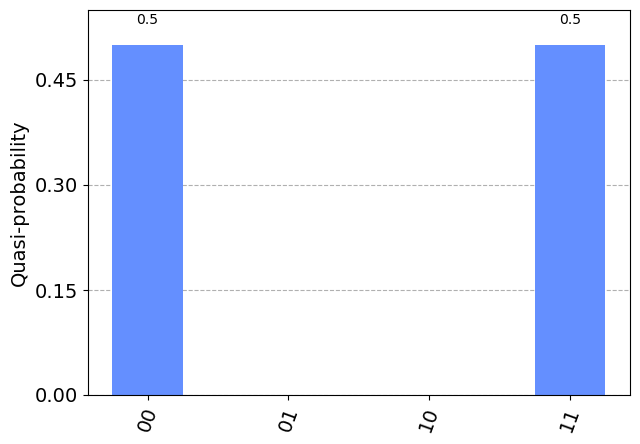

In [13]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
results = sampler.run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

In [12]:
results

SamplerResult(quasi_dists=[{0: 0.4999999999999999, 1: 0.0, 2: 0.0, 3: 0.4999999999999999}], metadata=[{}])

In [16]:
type(results.quasi_dists[0])

qiskit.result.distributions.quasi.QuasiDistribution

In [17]:
results.quasi_dists[0].binary_probabilities()

{'00': 0.4999999999999999, '01': 0.0, '10': 0.0, '11': 0.4999999999999999}